<a href="https://colab.research.google.com/github/MimaDalix/Code_med/blob/main/Delany_Solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solubility Data Professor**

# **Load data** 

In [52]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

In [53]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


# **Data Preparation**

### Data separation as x and y

In [54]:
y = df["logS"]

In [55]:
X = df.drop('logS', axis=1)

### Data splitting

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [8]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


# **Model Building**

## **Linear Regression**

### Training the model

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Applying the model to make a prediction

In [58]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### **Evaluate Model performance**

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [60]:
print('LR MSE (train)', lr_train_mse)
print('LR R2 (train)', lr_train_r2)
print('LR MSE (test)', lr_test_mse)
print('LR R2 (test)', lr_test_r2)

LR MSE (train) 1.0075362951093687
LR R2 (train) 0.7645051774663391
LR MSE (test) 1.0206953660861033
LR R2 (test) 0.7891616188563282


In [61]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **Random Forrest**

### **Training the Model**

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the Model to make a prediction**

In [67]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate Model performance**

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [69]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [70]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [71]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Support Vector Machine**

### **Training the Model**

In [73]:
from sklearn import svm


regr = svm.SVR()
regr.fit(X_train, y_train)

SVR()

### **Applying Model to make predictions**

In [74]:
y_regr_train_pred = regr.predict(X_train)
y_regr_test_pred = regr.predict(X_test)

### **Evaluate Model Performance**

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

regr_train_mse = mean_squared_error(y_train, y_regr_train_pred)
regr_train_r2 = r2_score(y_train, y_regr_train_pred)

regr_test_mse = mean_squared_error(y_test, y_regr_test_pred)
regr_test_r2 = r2_score(y_test, y_regr_test_pred)

In [76]:
regr_results = pd.DataFrame(['Support Vector Machine', regr_train_mse, regr_train_r2, regr_test_mse, regr_test_r2]).transpose()
regr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
regr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Support Vector Machine,2.329039,0.455626,2.721066,0.437927


# **Data Visualisation of prediction results**

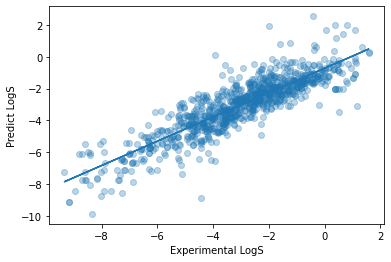

In [72]:
import matplotlib.pyplot as plt
import numpy as np
 
plt.scatter(x=y_train, y=y_lr_train_predict, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)


plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
plt.plot(y_train, p(y_train))